In [18]:
import astropalmerio.mc as mc
from astropalmerio.mc import utils
from astropalmerio.mc.drawings import sample_asym_norm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('mycyberpunk')

# Value is gaussian in linear space, what happens when you convert to log and then draw asymmetrically?

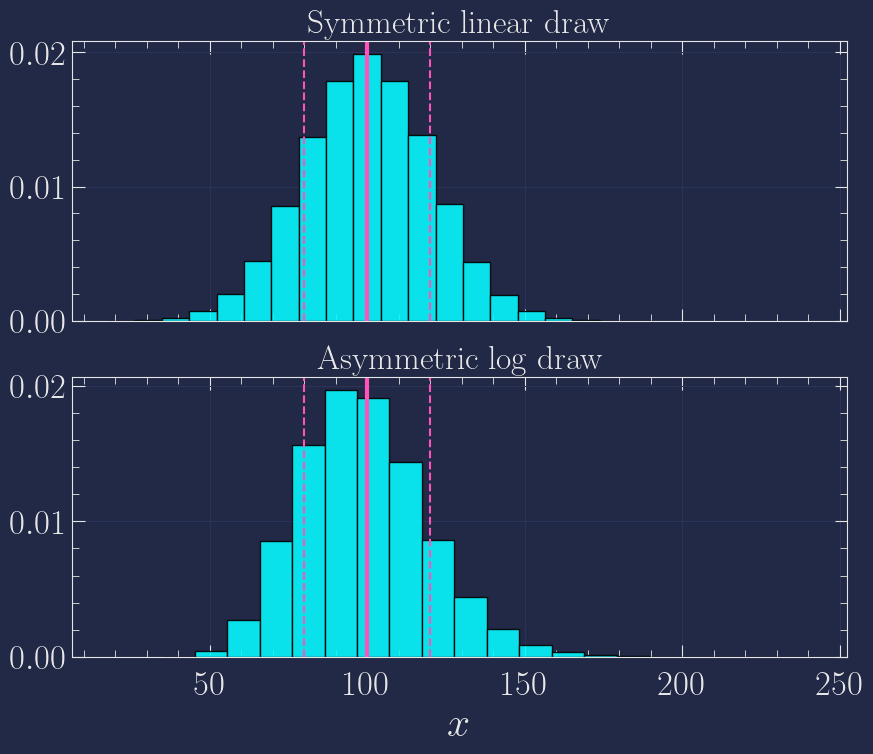

In [56]:
x = 100
x_errp = 20
nb_draws = int(1e5)

# Convert to log
logx, logx_errp, logx_errm = utils.lin_to_log(x, x_errp)

# Draw
log_draw = sample_asym_norm(logx, logx_errm, logx_errp, nb_draws=nb_draws)
draw = sample_asym_norm(x, x_errp, x_errp, nb_draws=nb_draws)

fig, axes = plt.subplots(2, sharex=True)
ax1 = axes[0]
ax2 = axes[1]
ax1.set_title('Symmetric linear draw')
ax2.set_title('Asymmetric log draw')
ax2.set_xlabel('$x$')

ax1.hist(draw, bins=20, alpha=0.9, density=True)
ax2.hist(10**log_draw, bins=20, alpha=0.9, density=True)
for ax in axes:
    ax.axvline(x, color='C1')
    ax.axvline(x+x_errp, ls='--', lw=1.5, color='C1')
    ax.axvline(x-x_errp, ls='--', lw=1.5, color='C1')

plt.show()

# Value is gaussian in log space, what happens when you convert to linear and then draw asymmetrically?

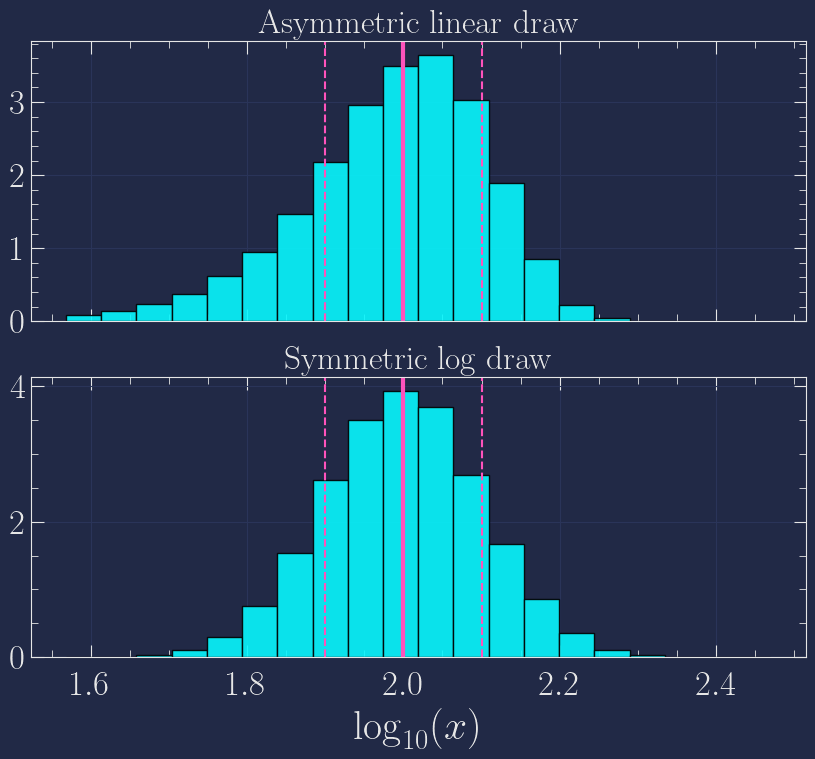

In [50]:
logx = 2
logx_errp = 0.1
nb_draws = int(1e5)

# Convert to lin
x, x_errp, x_errm = utils.log_to_lin(logx, logx_errp)

# Draw
log_draw = sample_asym_norm(logx, logx_errp, logx_errp, nb_draws=nb_draws)
draw = sample_asym_norm(x, x_errp, x_errp, nb_draws=nb_draws, val_min=0)

fig, axes = plt.subplots(2, sharex=True)
ax1 = axes[0]
ax2 = axes[1]
ax1.set_title('Asymmetric linear draw')
ax2.set_title('Symmetric log draw')

_, bins, _ = ax2.hist(log_draw, bins=20, alpha=0.9, density=True)
ax1.hist(np.log10(draw), bins=bins, alpha=0.9, density=True)
for ax in axes:
    ax.axvline(logx, color='C1')
    ax.axvline(logx+logx_errp, ls='--', lw=1.5, color='C1')
    ax.axvline(logx-logx_errp, ls='--', lw=1.5, color='C1')

ax2.set_xlabel(r'$\log_{10}(x)$')
plt.show()

# The difference between log and lin drawings depends on relative error in linear space and absolute error in log space

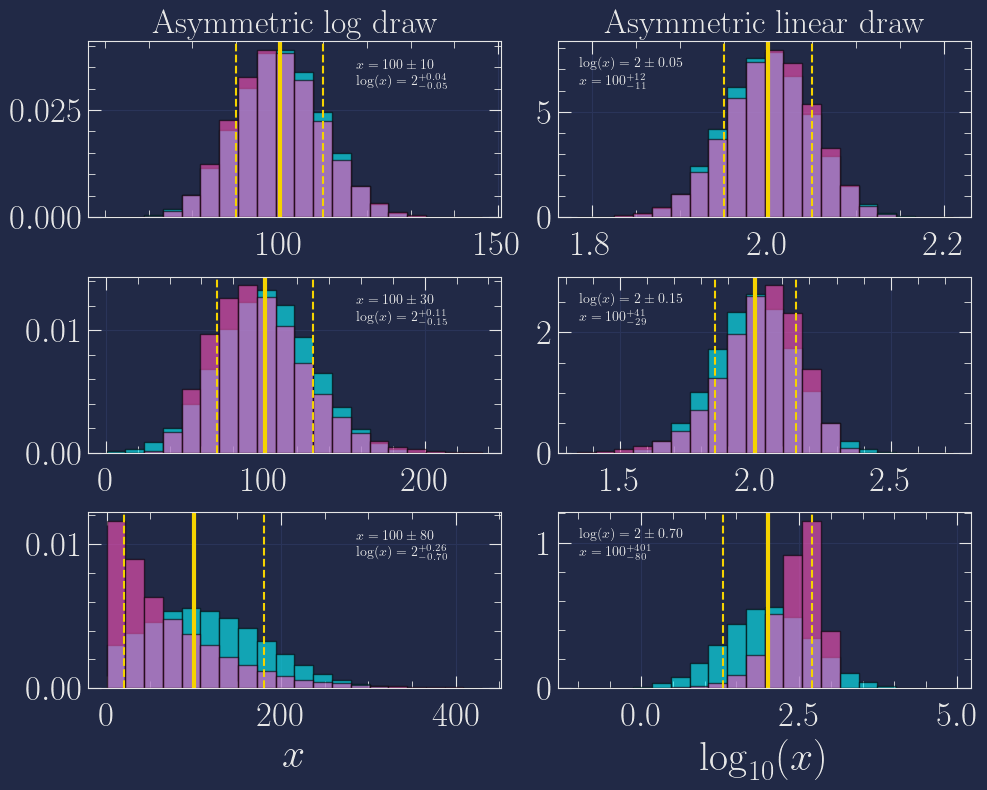

In [101]:

nb_draws = int(1e5)
x = 100
x_errps = np.asarray([0.1, 0.3, 0.8])*x
logx = 2
logx_errps = np.asarray([0.05, 0.15, 0.7])

fig, axes = plt.subplots(len(x_errps), 2, tight_layout=True)


axes[0,0].set_title('Asymmetric log draw')
axes[0,1].set_title('Asymmetric linear draw')
axes[-1,0].set_xlabel(r'$x$')
axes[-1,1].set_xlabel(r'$\log_{10}(x)$')

for x_errp, logx_errp, (ax1, ax2) in zip(x_errps, logx_errps, axes):
    # Convert to log
    logx_conv, logx_errp_conv, logx_errm_conv = utils.lin_to_log(x, x_errp)
    
    # Draw
    draw = sample_asym_norm(x, x_errp, x_errp, nb_draws=nb_draws, val_min=0)
    log_draw = sample_asym_norm(logx_conv, logx_errm_conv, logx_errp_conv, nb_draws=nb_draws)
    
    # Plot
    _, bins, _ = ax1.hist(draw, bins=20, alpha=0.6, density=True)
    ax1.hist(10**log_draw, bins=bins, alpha=0.6, density=True)
    
    # Convert to lin
    x_conv, x_errp_conv, x_errm_conv = utils.log_to_lin(logx, logx_errp)
    
    # Draw
    draw = sample_asym_norm(x_conv, x_errm_conv, x_errp_conv, nb_draws=nb_draws, val_min=0)
    log_draw = sample_asym_norm(logx, logx_errp, logx_errp, nb_draws=nb_draws)
    
    # Plot
    _, bins, _ = ax2.hist(log_draw, bins=20, alpha=0.6, density=True)
    ax2.hist(np.log10(draw), bins=bins, alpha=0.6, density=True)

    
    ax1.axvline(x, color='C2')
    ax1.axvline(x+x_errp, ls='--', lw=1.5, color='C2')
    ax1.axvline(x-x_errp, ls='--', lw=1.5, color='C2')
    ax2.axvline(logx, color='C2')
    ax2.axvline(logx+logx_errp, ls='--', lw=1.5, color='C2')
    ax2.axvline(logx-logx_errp, ls='--', lw=1.5, color='C2')
    
    ax1.annotate(fr'$x={x:.0f}\pm{x_errp:.0f}$', (0.65, 0.85), xycoords='axes fraction')
    ax1.annotate(fr'$\log(x)={logx_conv:.0f}^{{+{logx_errp_conv:.2f}}}_{{-{logx_errm_conv:.2f}}}$', (0.65, 0.75), xycoords='axes fraction')
    ax2.annotate(fr'$\log(x)={logx:.0f}\pm{logx_errp:.2f}$', (0.05, 0.85), xycoords='axes fraction')
    ax2.annotate(fr'$x={x_conv:.0f}^{{+{x_errp_conv:.0f}}}_{{-{x_errm_conv:.0f}}}$', (0.05, 0.75), xycoords='axes fraction')

plt.show()

In [102]:
fig.savefig('Asymmetric_drawings_for_lin_and_log.png')